# Basic setup for fetching data from the facebook api

### Remember to add an active access token below and adjust the parameters and fields if necessary

In [ ]:
'''
Visualization attempts
https://pandas.pydata.org/pandas-docs/dev/getting_started/intro_tutorials/09_timeseries.html
'''
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting spending over time and impressions over time 
fig, axes = plt.subplots(2,1,figsize=(8,4))
data.plot(x="ad_creation_time", y="impressions", ax=axes[0])
data.plot(x="ad_creation_time", y="spend", ax=axes[1])

In [ ]:
# Plot range of impressions
plt.fill_between(x=data["ad_creation_time"], y1=data["impressions_lo"], y2=data["impressions_hi"], alpha=1, color="green")
plt.plot(data["ad_creation_time"], data["impressions"])
plt.show()

In [ ]:
# Scraper experiement
# https://github.com/kevinzg/facebook-scraper

from facebook_scraper import get_page_info

page = get_page_info(account="SenatorBobCasey")

page

In [ ]:
import time

members_fbNames_test = [] # list of tuples

for value in congress_members["facebook"].items():
    if not pd.isnull(value[1]):
        page = get_page_info(account=value[1])
        print(page)
        if "name" and "identifier" in page:
            members_fbNames_test.append((value[1], page["name"], page["identifier"]))
            print(page["name"] + " id:" + str(page["identifier"]))
    time.sleep(0.5)

In [ ]:
# test
# trying to make continuous loop to fetch all data
import sys
sys.path.append('../src') 
import numpy as np
import pandas as pd
from political_ads.api_request import API_request
from political_ads.preprocessor import Preprocessor

preprocess = Preprocessor()

file = preprocess.file_to_df("..\\data\\all_politicians_aggregated.txt")

In [22]:
from political_ads.keyword_filter import Filter

filter = Filter()
climate_ads = filter.get_climate_ads(file)

In [24]:
len(climate_ads)

19178

In [ ]:
import pandas as pd

rest = pd.read_("..\\src\\data_sets\\cleaning_update.csv")

In [ ]:
'''
Put page ids in set, then fetch results and write to single file
'''
# fetch all ads by one page and concatenate them to final file
import sys
sys.path.append('../src') 
import numpy as np
import pandas as pd
from political_ads.api_request import API_request
from political_ads.preprocessor import Preprocessor
import json

pid_list = rest[rest["page_id"] != "no ad account"]["page_id"].tolist()
congress_pid_set = set(rest["page_id"]) # make set of page ids

requestor = API_request() # api connection

counter = 0
while len(congress_pid_set) > 0:
    p_id = congress_pid_set.pop() # get next page_id
    politician = rest[rest["page_id"] == p_id]  # get corresponding entry in df
    politician_name = politician.full_name.values[0].replace(" ", "_") # name of politician
    politician_name_ch = politician_name.replace("\"", "")
    print(f"New name: {politician_name_ch}")
    try:
        print(f"Try politician {politician_name_ch} and count: {counter}") 
        ads_data = requestor.dataset_by_pageId_asString(500, [p_id], "EAAD3So8oorMBAF9GlbcJy7hMZCUoZClsYZCTAnBpScBns30g0OAZBZAsujMLMsMH4Le9LchJ4UnVqgN8mCDvaOPoZBjfFGEpx3hcWiZAWiJswGPrLZCeHb2K3ZA9OvMuMKrUT9bpnFjtMdY6kvOjZCK8u8xSFJbUWtUKluVobqZAUUk2BTgxsgCErZAyj0FJowrzLAHkPzGY6aOZBvrZBzpJmhppZCmwCple7PQT667ZCJUJXXG8j11a7FRpIGpTZCmxeKtEjuX8ZD")
        final_str = json.dumps(ads_data) 
        print(final_str)
        jsonFile = open(f"..\\rest_files\\{politician_name_ch}_{p_id}.txt", "w") # filepath and name specified here!
        print(final_str)
        jsonFile.write(final_str)
        jsonFile.close()
        print(f"Successfully created file for {politician_name_ch}. Length of set is now: {len(congress_pid_set)}")
    except:
        congress_pid_set.add(p_id) # add element back to set and try again
        print(f"Error occured for politician {politician_name} with page_id {p_id}")
        pass

In [ ]:
still_missing = set(["106904617757749", "1925027940842417", "1491458271125644", "115356957005", "2429204567121956", "62808739121"])

'''
Robert_C._"Bobby" Scott
Earl_L._"Buddy"_Carter
Jesús_G._"Chuy"_García
Henry_C._"Hank"_Johnson
Eric_A._"Rick"_Crawford
Charles_J._"Chuck"_Fleischmann
'''


In [ ]:
# Boxplot showing outliers of top 10 politicians spending per ads
import matplotlib.pyplot as plt
data.boxplot(by='page_name', column=['spend'], rot=45)
plt.xlabel("Politician")
plt.ylabel('Spend')
plt.title('Spend per ad')

In [ ]:
import sys
sys.path.append('../src') 
from political_ads.visualizer import Visualizer

viz = Visualizer()

viz.spend_over_time_cum(sherrod_brown_grouped_by_day, "Sherrod Brown")

In [ ]:
import sys
sys.path.append('../src') 
from political_ads.preprocessor import Preprocessor

preprocess = Preprocessor()
big_data = preprocess.file_to_df("..\\data\\all_politicians_aggregated.txt")

In [ ]:
text = " s is a pressing issue Economic climate climate warming , we have to act now!!!"

check = "climate" or ("global" and "warming") (not ("business climate" or "economic climate" or "biz climate"))

def check_for_climate_ad(text: str): # returns true if climate related keyword contained, false otherwise
    # text_lower = list((map(lambda x: x.lower(), text)))
    text_lower = text.lower()
    return ("climate" in text_lower) | (("global" in text_lower) and ("warming" in text_lower)) and (("business climate" not in text_lower) | ("economic climate" not in text_lower)) 

def check_for_NON_climate_ad(text: str): # returns true if climate related keyword contained, false otherwise
    # text_lower = list((map(lambda x: x.lower(), text)))
    text_lower = text.lower()
    return not ("climate" in text_lower) | (("global" in text_lower) and ("warming" in text_lower)) and (("business climate" not in text_lower) | ("economic climate" not in text_lower)) 


In [45]:
from nltk.tokenize import word_tokenize

res = word_tokenize(big_data["ad_creative_body"][0])

x = list(map(lambda x: x.lower(),res))

big_data["climate?"] = big_data["ad_creative_body"].apply(lambda x: "yes" if check_for_climate_ad(str(x)) else "nope")

NameError: name 'big_data' is not defined

In [44]:
climate_ads = big_data[big_data.apply(lambda x: check_for_climate_ad(str(x["ad_creative_body"])),axis=1)]
climate_ads

NameError: name 'big_data' is not defined

In [ ]:
non_climate_ads = big_data[big_data.apply(lambda x: check_for_NON_climate_ad(str(x["ad_creative_body"])),axis=1)]

In [ ]:
climate_ads_by_day = grouper.group_ads_by_day(climate_ads)
climate_ads.head(1)

In [ ]:
def calc_spend_per_impr(x):
    return x.impressions/x.spend

In [ ]:
climate_ads["impr_per_dollar"] = climate_ads.apply(lambda x: calc_spend_per_impr(x), axis=1)
non_climate_ads["impr_per_dollar"] = non_climate_ads.apply(lambda x: calc_spend_per_impr(x), axis=1)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, (ax, ax1) = plt.subplots(1, 2, sharey=True, figsize=(10,5))
fig.suptitle('Comparison impressions per dollar')
ax.set_title('Non-climate-related ads')
ax1.set_title('Climate-related ads')

sns.set_theme(style="darkgrid")

sns.boxplot(ax=ax, y=non_climate_ads["impr_per_dollar"], color="purple", showmeans=True)
sns.boxplot(ax= ax1, y=climate_ads["impr_per_dollar"],color="teal", showmeans=True)
ax.set_yscale('log')
ax1.set_yscale('log')

In [ ]:
climate_ads["ad_creative_body"].to_csv("climate_ads_test.csv")

In [ ]:
# https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/
# This graph: https://swdevnotes.com/python/2020/display-line-chart-range/
import matplotlib.pyplot as plt
politician = 'Democrats'

# df_c = u5mr_df.loc[([country]), :]
df_c = big_data_democrats_by_day
days = df_c.ad_creation_time
lower = df_c.sum_spend_lo.cumsum()
average = df_c.avg_spend.cumsum()
upper = df_c.sum_spend_hi.cumsum()

title = f'Cumulative spend of {politician}'

fig, ax = plt.subplots(figsize = (8,5), facecolor = plt.cm.Blues(.2))
fig.suptitle(title, fontsize = 'xx-large',  fontweight = 'bold')

ax.set_facecolor(plt.cm.Blues(.2))
ax.plot(days, upper, label = 'Upper')
ax.plot(days, average, label = 'Average')
ax.plot(days, lower, label = 'Lower')
ax.legend(bbox_to_anchor = (0.9, 0.9),
          loc = 'lower left',
          frameon = False,
          fontsize = 'small')
ax.set_ylabel('Cumulated spend in $', fontsize = 'large')
ax.set_xlabel('Time', fontsize=14)
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.fill_between(days, lower, upper, alpha=0.2)
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
plt.show()

In [1]:
no_ads = by_page["no_ads"].sum()
no_sites = len(by_page)
print(f"Dataset contains {no_sites} pages with total of {no_ads} ads.")
ads_per_page = no_ads/no_sites
total_appr = int(538 * ads_per_page)
print(f"Therefore whole dataset contains appr. {total_appr} ads")

NameError: name 'by_page' is not defined

In [1]:
import sys
sys.path.append('../src') 
from political_ads.preprocessor import Preprocessor

preprocess = Preprocessor()
data = preprocess.file_to_df("..\\data\\all_politicians_aggregated.txt")

In [72]:
data.isna().sum()["delivery_by_region"]

139144

In [75]:
data.isna().sum()["delivery_by_region"] / data.shape[0] 

0.2308819356754936

In [107]:
from political_ads.grouper import Grouper
from political_ads.visualizer import Visualizer

grouper = Grouper()
viz = Visualizer()

republicans = grouper.group_ads_by_party_by_day(data, "Republican")
democrats = grouper.group_ads_by_party_by_day(data, "Democrat")

In [136]:
from political_ads.keyword_filter import Filter

filter = Filter()

climate_ads = filter.get_climate_ads(data) 
non_climate_ads = data[data.apply(lambda x: filter.check_for_NON_climate_ad(str(x["ad_creative_body"])),axis=1)] # returns the rows that return true

In [63]:
pages = data.groupby(["page_id", "page_name"]).agg(
     # Aggregate no of ads
            no_ads = ('id', 'count'),
).reset_index()

In [111]:
republicans_climate = grouper.group_ads_by_party_by_day(climate_ads, "Republican")
democrats_climate = grouper.group_ads_by_party_by_day(climate_ads, "Democrat")

In [18]:
import pandas as pd
congress = pd.read_csv("..\\src\\data_sets\\legislators_fb_info_final.csv") # read congress member info

In [24]:
congress[congress["page_id"] == "6266829799"]["party"].values[0]

'Democrat'

In [134]:
# all_climate = grouper.group_ads_by_page(climate_ads)
non_climate = non_climate_ads.groupby("page_id").agg(
     # Aggregate no of ads
            no_ads = ('id', 'count'),
            # Aggregate sum of spend & total impressions generated
            sum_spend_lo = ('spend_lo', 'sum'),
            sum_spend_hi = ('spend_hi', 'sum'),
            median_spend = ('spend', 'median'),
            avg_spend = ('spend', 'sum'),
            sum_impressions_lo = ('impressions_lo', 'sum'),
            sum_impressions_hi = ('impressions_hi', 'sum'),
            # Average number of impressions & spend per ad
            avg_impressions = ('impressions', 'sum')
        ).reset_index()

all_climate = climate_ads.groupby("page_id").agg(
     # Aggregate no of ads
            no_ads = ('id', 'count'),
            # Aggregate sum of spend & total impressions generated
            sum_spend_lo = ('spend_lo', 'sum'),
            sum_spend_hi = ('spend_hi', 'sum'),
            median_spend = ('spend', 'median'),
            avg_spend = ('spend', 'sum'),
            sum_impressions_lo = ('impressions_lo', 'sum'),
            sum_impressions_hi = ('impressions_hi', 'sum'),
            # Average number of impressions & spend per ad
            avg_impressions = ('impressions', 'sum')
        ).reset_index()

In [135]:
all_climate

,page_id,no_ads,sum_spend_lo,sum_spend_hi,median_spend,avg_spend,sum_impressions_lo,sum_impressions_hi,avg_impressions
0,1000253160054572,221,300,22179,49.5,11239.5,99000,331779,215389.5
1,1012679305536045,1,1000,1499,1249.5,1249.5,100000,124999,112499.5
2,1024984580892392,25,12200,16275,349.5,14237.5,552000,666975,609487.5
3,10519905140,4,0,396,49.5,198.0,18000,21996,19998.0
4,107199049318619,126,6500,19374,49.5,12937.0,411000,600874,505937.0
...,...,...,...,...,...,...,...,...,...
148,9514417573,1,200,299,249.5,249.5,25000,29999,27499.5
149,95538659845,11,0,1089,49.5,544.5,9000,19989,14494.5
150,97493741436,768,179200,287432,49.5,233316.0,7211000,9167232,8189116.0
151,983573491675080,5,3300,4195,649.5,3747.5,251000,291995,271497.5


In [94]:
import pandas as pd
merged_climate = pd.merge(left=non_climate, right=all_climate, on="page_id", how="inner")

In [95]:
def add_up(x):
    return 100 * (x["no_ads_y"]/(x["no_ads_y"] + x["no_ads_x"]))

In [96]:
merged_climate["climate_ad_ratio"] = merged_climate.apply(lambda x: add_up(x), axis=1)

In [218]:
merged_climate.sort_values(by="climate_ad_ratio", ascending=False)

,page_id,no_ads_x,sum_spend_lo_x,sum_spend_hi_x,median_spend_x,avg_spend_x,sum_impressions_lo_x,sum_impressions_hi_x,avg_impressions_x,no_ads_y,sum_spend_lo_y,sum_spend_hi_y,median_spend_y,avg_spend_y,sum_impressions_lo_y,sum_impressions_hi_y,avg_impressions_y,climate_ad_ratio
111,58080781287,22,300,2478,49.5,1389.0,28000,53978,40989.0,50,6900,12650,49.5,9775.0,218000,288950,253475.0,69.444444
39,1667702233477156,72,26400,38028,49.5,32214.0,1955000,2361928,2158464.0,49,10400,16051,49.5,13225.5,482000,600951,541475.5,40.495868
134,7801901317,135,48400,70665,49.5,59532.5,3781000,4517865,4149432.5,80,3900,12220,49.5,8060.0,48000,135920,91960.0,37.209302
88,344330745672593,78,9400,17922,49.5,13661.0,331000,468922,399961.0,44,1500,5856,49.5,3678.0,38000,85956,61978.0,36.065574
62,211797415586435,9,1500,2791,149.5,2145.5,141000,166991,153995.5,3,1400,1697,649.5,1548.5,122000,142997,132498.5,25.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,1012679305536045,614,256800,365386,149.5,311093.0,15936000,19194386,17565193.0,1,1000,1499,1249.5,1249.5,100000,124999,112499.5,0.162602
126,6817812700,678,181700,276122,49.5,228911.0,12006000,14650322,13328161.0,1,200,299,249.5,249.5,15000,19999,17499.5,0.147275
110,57495285387,9110,918400,1932390,49.5,1425395.0,29436000,42712890,36074445.0,13,2600,4287,149.5,3443.5,37000,53987,45493.5,0.142497
106,485980975070908,1608,397200,617092,49.5,507146.0,21127000,26068392,23597696.0,2,400,598,249.5,499.0,20000,29998,24999.0,0.124224


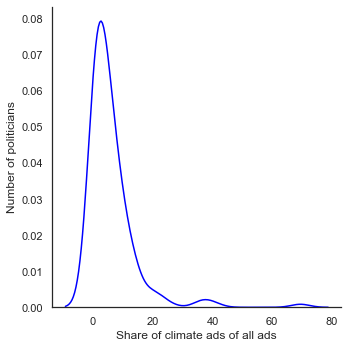

In [186]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.displot(data=merged_climate, x="climate_ad_ratio", kind="kde", palette="bright", color="blue")
# THIS PLOT ONLY INCLUDES THE POLITICIANS THAT DO HAVE CLIMATE ADS! n=153

<Figure size 1296x864 with 0 Axes>

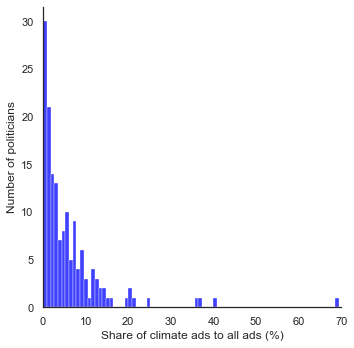

In [219]:
plt.figure(figsize=(18,12))
sns.displot(merged_climate["climate_ad_ratio"], kde=False, color='blue', bins=80)
plt.ylabel("Number of politicians")
plt.xlabel("Share of climate ads to all ads (%)")
plt.xlim([0,70])
# plt.savefig("..\\plots\\ad_distribution.pdf")
plt.show()

In [ ]:
def get_party(x):
    congress = pd.read_csv("..\\src\\data_sets\\legislators_fb_info_final.csv") # read congress member info
    
    congress[congress["page_id"] == x]["party"].values[0]


In [152]:
'''
Get pages and their no of ads with the party they belong to
'''

import seaborn as sns
import matplotlib.pyplot as plt
# PLOT NO OF PEOPLE AND THEIR SHARE OF CLIMATE ADS VS TOTAL ADS

page_all_climate = climate_ads.groupby(["page_name", "page_id"]).agg(
     # Aggregate no of ads
            no_ads = ('id', 'count'),
            # Aggregate sum of spend & total impressions generated
            sum_spend_lo = ('spend_lo', 'sum'),
            sum_spend_hi = ('spend_hi', 'sum'),
            median_spend = ('spend', 'median'),
            avg_spend = ('spend', 'sum'),
            sum_impressions_lo = ('impressions_lo', 'sum'),
            sum_impressions_hi = ('impressions_hi', 'sum'),
            # Average number of impressions & spend per ad
            avg_impressions = ('impressions', 'sum')
        ).reset_index().sort_values(by="no_ads", ascending=False)

congress = pd.read_csv("..\\src\\data_sets\\legislators_fb_info_final.csv") # read congress member info
        # Check if available
page_all_climate["party"] = page_all_climate["page_id"].apply(lambda x: congress[congress["page_id"] == x]["party"].values[0]) # add party to pages

# Needs to 

In [156]:
page_all_climate["page_name"].drop_duplicates(inplace=True)

In [157]:
page_all_climate

,page_name,page_id,no_ads,sum_spend_lo,sum_spend_hi,median_spend,avg_spend,sum_impressions_lo,sum_impressions_hi,avg_impressions,party
6,Alexandria Ocasio-Cortez,1316372698453411,3303,166600,519297,49.5,342948.5,9969000,14703697,12336348.5,Democrat
16,Bernie Sanders,124955570892789,2808,173600,470092,49.5,321846.0,16825000,22222192,19523596.0,Independent
23,Captain Mark Kelly,163148530407080,1564,84000,246936,49.5,165468.0,2839000,4736436,3787718.0,Democrat
92,Kirsten Gillibrand,6820348410,1368,72200,217532,49.5,144866.0,2218000,3916632,3067316.0,Democrat
58,Elizabeth Warren,38471053686,1209,101300,239191,49.5,170245.5,7581000,9746792,8663896.0,Democrat
...,...,...,...,...,...,...,...,...,...,...,...
78,Jim Himes for Congress,7530258205,1,600,699,649.5,649.5,50000,59999,54999.5,Democrat
34,Congressman Adriano Espaillat,1808068199405179,1,0,99,49.5,49.5,1000,1999,1499.5,Democrat
57,Elissa Slotkin for Congress,1012679305536045,1,1000,1499,1249.5,1249.5,100000,124999,112499.5,Democrat
82,Joe Courtney for Congress,6596078916,1,200,299,249.5,249.5,15000,19999,17499.5,Democrat


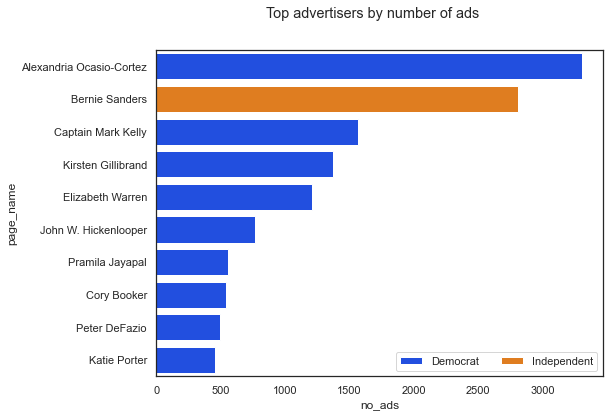

In [190]:
import seaborn as sns
import matplotlib.pyplot as plt
# Plot the result
sns.set_theme(style="white")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(8, 6))

# Plot the scores
# sns.set_color_codes("pastel")
sns.barplot(x=page_all_climate[:10]["no_ads"], y=page_all_climate[:10]["page_name"],
             color="b", hue=page_all_climate[:10]["party"], palette="bright", dodge=False)
f.suptitle("Top advertisers by number of ads")
# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
# ax.set(xlim=(3.9, 4.3), ylabel="",
#        xlabel="")
# fig.savefig("..\\plots\\top_advertisers_no_ads.pdf") # DOESNT WORK?!?!?!?

In [112]:
republicans_climate

,ad_creation_time,no_ads,sum_spend_lo,sum_spend_hi,median_spend,avg_spend,sum_impressions_lo,sum_impressions_hi,avg_impressions
0,2018-06-05,1,100,199,149.5,149.5,10000,14999,12499.5
1,2018-10-30,2,0,198,49.5,99.0,2000,3998,2999.0
2,2018-11-02,1,0,99,49.5,49.5,0,999,499.5
3,2019-03-04,1,500,599,549.5,549.5,30000,34999,32499.5
4,2019-10-31,1,0,99,49.5,49.5,4000,4999,4499.5
5,2019-11-01,1,100,199,149.5,149.5,4000,4999,4499.5
6,2020-03-31,2,100,298,99.5,199.0,49000,54998,51999.0
7,2020-04-20,2,0,198,49.5,99.0,17000,22998,19999.0
8,2020-05-04,1,100,199,149.5,149.5,35000,39999,37499.5
9,2020-07-21,1,0,99,49.5,49.5,2000,2999,2499.5


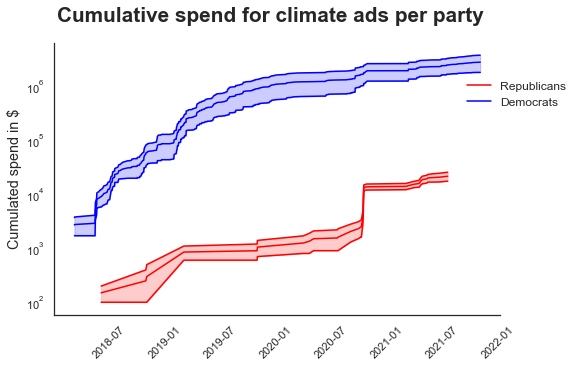

In [164]:
# As input needs dataframe containing the advertisements GROUPED BY DAY!
# Can be done for individual politicians or even groups like reps or dems        # https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/
# This graph: https://swdevnotes.com/python/2020/display-line-chart-range/
sns.set_theme(style="white")

df_1 = republicans_climate
days = df_1.ad_creation_time
lower = df_1.sum_spend_lo.cumsum()
average = df_1.avg_spend.cumsum()
upper = df_1.sum_spend_hi.cumsum()

title = f'Cumulative spend for climate ads per party'

fig, ax1 = plt.subplots(figsize = (8,5))

fig.suptitle(title, fontsize = 'xx-large',  fontweight = 'bold')

ax1.plot(days, upper, label = 'Republicans', color="red")
ax1.plot(days, average, color="red")
ax1.plot(days, lower, color="red")
ax1.set_ylabel('Cumulated spend in $', fontsize = 'large')
# ax1.set_xlabel('Time', fontsize=14)
        # Hide the right and top spines
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.fill_between(days, lower, upper, alpha=0.2, color="red")

# Second plot
df_2 = democrats_climate
days_2 = df_2.ad_creation_time
lower_2 = df_2.sum_spend_lo.cumsum()
average_2 = df_2.avg_spend.cumsum()
upper_2 = df_2.sum_spend_hi.cumsum()

ax1.plot(days_2, upper_2, label = 'Democrats', color="blue")
ax1.plot(days_2, average_2, color="blue")
ax1.plot(days_2, lower_2,color="blue")
ax1.fill_between(days_2, lower_2, upper_2, alpha=0.2, color="blue")

ax1.legend(bbox_to_anchor = (0.9, 0.9),
                loc = 'upper left',
                frameon = False,
                fontsize = 'medium')
plt.yscale("log")
plt.xticks(rotation = 45) # Rotates X-ax1is Ticks by 45-degrees
plt.show()
fig.savefig("..\\plots\\climate_both_spend.pdf")


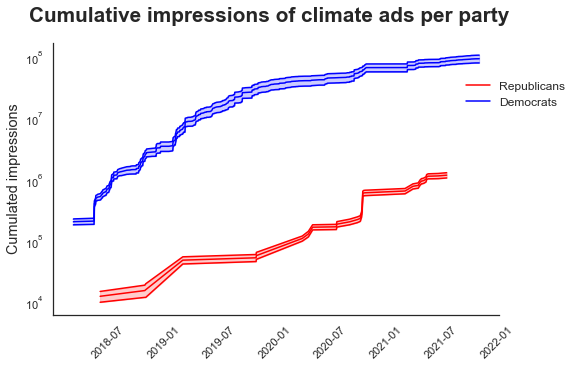

In [165]:
 # https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/
        # This graph: https://swdevnotes.com/python/2020/display-line-chart-range/
        # df_c = u5mr_df.loc[([country]), :]
import matplotlib.pyplot as plt
sns.set_theme(style="white")

df_c = republicans_climate
days = df_c.ad_creation_time
lower = df_c.sum_impressions_lo.cumsum()
average = df_c.avg_impressions.cumsum()
upper = df_c.sum_impressions_hi.cumsum()

title = f'Cumulative impressions of climate ads per party'

fig, ax = plt.subplots(figsize = (8,5))
fig.suptitle(title, fontsize = 'xx-large',  fontweight = 'bold')

ax.plot(days, upper, label = 'Republicans', color="red")
ax.plot(days, average, color="red")
ax.plot(days, lower, color="red")  

ax.set_ylabel('Cumulated impressions', fontsize = 'large')
# ax.set_xlabel('Time', fontsize=14)
        # Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.fill_between(days, lower, upper, alpha=0.2, color="red")


# Second plot
df_2 = democrats_climate
days_2 = df_2.ad_creation_time
lower_2 = df_2.sum_impressions_lo.cumsum()
average_2 = df_2.avg_impressions.cumsum()
upper_2 = df_2.sum_impressions_hi.cumsum()

ax.plot(days_2, upper_2, label = 'Democrats', color="blue")
ax.plot(days_2, average_2, color="blue")
ax.plot(days_2, lower_2,color="blue")
ax.fill_between(days_2, lower_2, upper_2, alpha=0.2, color="blue")

ax.legend(bbox_to_anchor = (0.9, 0.9),
                loc = 'upper left',
                frameon = False,
                fontsize = 'medium')

plt.yscale("log")
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
plt.show()
fig.savefig("..\\plots\\climate_both_impressions.pdf")


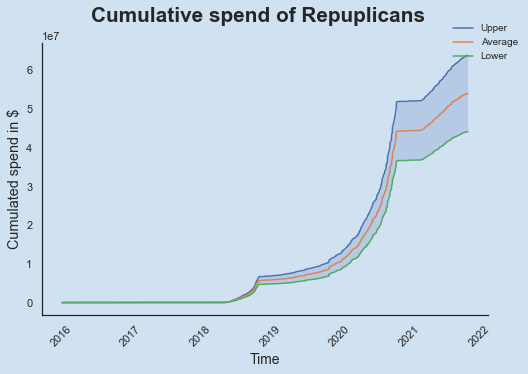

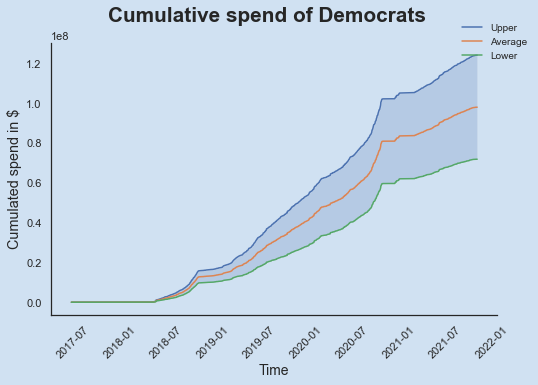

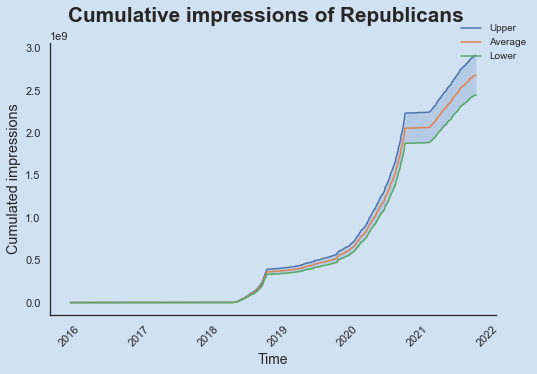

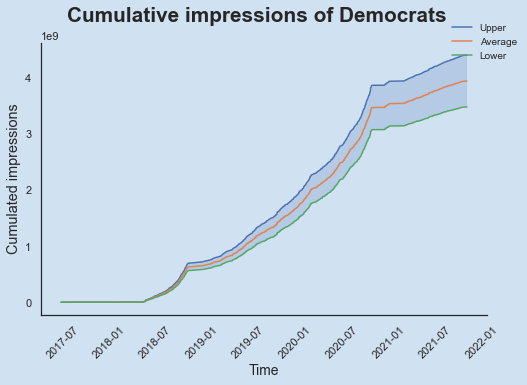

In [220]:
import matplotlib.pyplot as plt
viz.spend_over_time_cum(republicans, "Repuplicans")
viz.spend_over_time_cum(democrats, "Democrats")
viz.impressions_over_time_cum(republicans, "Republicans")
viz.impressions_over_time_cum(democrats, "Democrats")

In [13]:
from political_ads.keyword_filter import Filter

filter = Filter()

climate_ads = filter.get_climate_ads(data) 
climate_ads.shape

(19178, 14)

In [19]:
republicans_climate = grouper.group_ads_by_party_by_day(climate_ads, "Republican")
democrats_climate = grouper.group_ads_by_party_by_day(climate_ads, "Democrat")

In [30]:
import pandas as pd

congress = pd.read_csv("..\\src\\data_sets\\legislators_fb_info_final.csv") # read congress member info
        
republican_members = congress[congress["party"] == "Republican"]  # get all page id's that match the given party

reps_climate_ads = climate_ads[climate_ads.page_id.isin(republican_members.page_id)] # get all the ads where page id matches with the party page id's


In [32]:
      
democrat_members = congress[congress["party"] == "Democrat"]  # get all page id's that match the given party

dems_climate_ads = climate_ads[climate_ads.page_id.isin(democrat_members.page_id)] # get all the ads where page id matches with the party page id's


In [43]:
dems_climate_ads["ad_creative_body"][1932]

'Under Mitch McConnell\'s "leadership," the US Senate refuses to even consider critical issues passed by the House -- tackling corruption, the climate crisis, the border crisis, police reform, gun safety, coronavirus testing, economic recovery, and so much more.  Chip in now and let\'s take back the Senate!'

In [39]:
dems_climate_ads["ad_creative_body"].drop_duplicates(inplace=True)

C:\Python39\lib\site-packages\pandas\core\series.py:2136: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


In [40]:
dems_climate_ads["ad_creative_body"][:10]

1932    Under Mitch McConnell's "leadership," the US S...
1936    Under Mitch McConnell's "leadership," the US S...
1939    Under Mitch McConnell's "leadership," the US S...
1940    Under Mitch McConnell's "leadership," the US S...
1943    Under Mitch McConnell's "leadership," the US S...
1950    Under Mitch McConnell's "leadership," the US S...
1963    Under Mitch McConnell's "leadership," the US S...
1964    Under Mitch McConnell's "leadership," the US S...
1969    Under Mitch McConnell's "leadership," the US S...
1977    Under Mitch McConnell's "leadership," the US S...
Name: ad_creative_body, dtype: object

In [29]:
len(reps_climate_ads["ad_creative_body"].drop_duplicates())

22

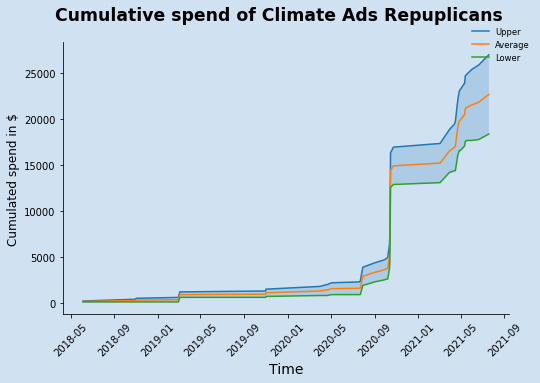

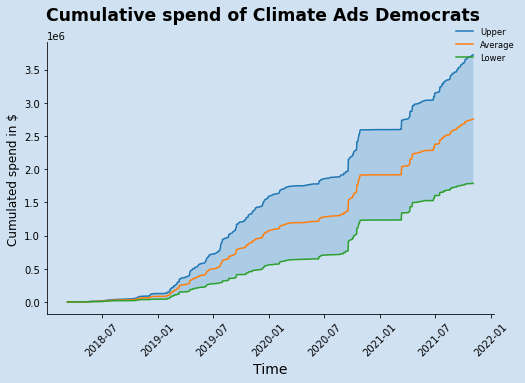

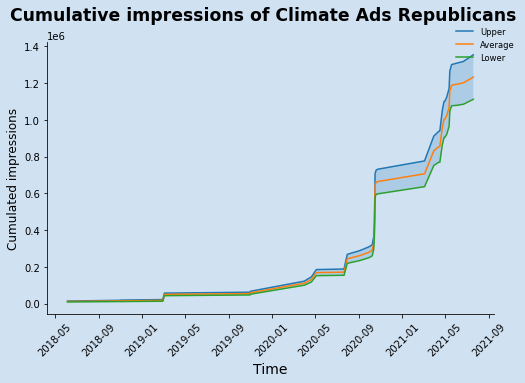

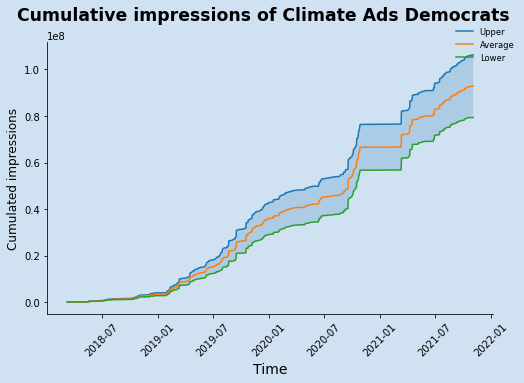

In [21]:
viz.spend_over_time_cum(republicans_climate, "Climate Ads Repuplicans")
viz.spend_over_time_cum(democrats_climate, "Climate Ads Democrats")
viz.impressions_over_time_cum(republicans_climate, "Climate Ads Republicans")
viz.impressions_over_time_cum(democrats_climate, "Climate Ads Democrats")

In [59]:
current = pd.read_csv("..\\src\\data_sets\\legislators-current.csv")
next = pd.read_csv("..\\src\\data_sets\\legislators-current.csv")
final = pd.read_csv("..\\src\\data_sets\\legislators_fb_info_final.csv")

In [61]:
final.isna().sum()

Unnamed: 0        0
Unnamed: 0.1      0
first_name        0
last_name         0
full_name         0
type              0
state             0
district        100
party             0
facebook        164
page_name       343
identifier        0
page_id           0
dtype: int64

In [58]:
current[current["facebook"].isnull()][["full_name", "facebook"]]

,full_name,facebook
6,Amy Klobuchar,NaN
35,Earl Blumenauer,NaN
50,Bill Cassidy,NaN
126,Ben Ray Luján,NaN
145,Patty Murray,NaN
...,...,...
533,Claudia Tenney,NaN
534,Julia Letlow,NaN
535,Troy A. Carter,NaN
536,Melanie A. Stansbury,NaN
